Author documentation: 
- Student data, timesheets
- Required libraries and installs (e.g. „pip“ commands)
- Description of data and ground truth + split for training, testing, validation. Please do not include the videos themselves.
- Description of feature extraction methods (if applicable)
- Classification: Process and results of training and testing
- Results: Results of validation, indicators + the mandatory ROC curves of classifier performance
- Discussion of results

# Similarity Modeling 1/2: Recognizing Swedish Chef with Deep Learning  

#### Student
Matthias Hofmaier (11944050)
#### Timesheet

2022/11/23 | 16:30 - 18:00 | Setup Jupyter Environment and Project          
2022/11/23 | 18:00 - 19:30 | Exploration and Preparation of Ground Truth         

#### Required libraries and installs

In [28]:
!cat requirements-dl-audio.txt
#!pip install -r requirements-dl-audio.txt

python==3.9
pandas
numpy
matplotlib

## Imports

In [38]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2


## Constants

In [39]:
DATA_PATH = '../data/'
GROUND_TRUTH_PATH = os.path.join(DATA_PATH, 'sim12-ground-truth-muppets')
VIDEO_PATH = os.path.join(DATA_PATH, 'SIM12 Ground Truth')

# Data Preparation

## Load ground truth data
The columns in the CSV files indicate at which frames Kermit, Waldorf & Statler, Pigs and/or the Danish chef are visually present (no prefix) or can be heared ("Audio_*").

In [14]:
gts = []
for fname in os.listdir(GROUND_TRUTH_PATH):
    if fname.startswith('GroundTruth'):
        df = pd.read_csv(os.path.join(GROUND_TRUTH_PATH, fname), sep=';')
        gts.append(df)
gts[0].head()

,Video,Frame_number,Kermit,Pigs,Audio_Pigs,Cook,Audio_Cook,StatlerWaldorf,Audio_StatlerWaldorf,Audio_MissPiggy
0,343,0,0,0,0,0,0,0,0,0
1,343,1,0,0,0,0,0,0,0,0
2,343,2,0,0,0,0,0,0,0,0
3,343,3,0,0,0,0,0,0,0,0
4,343,4,0,0,0,0,0,0,0,0


The column that is of our interest is 'Audio_Cook'.

## Load video data

In [43]:
#def load_video(path):
videos = []
for fname in os.listdir(VIDEO_PATH):
    if fname.startswith('Muppets'):
        vidcap = cv2.VideoCapture(os.path.join(VIDEO_PATH, fname))
        fps = vidcap.get(cv2.CAP_PROP_FPS)
        videos.append(vidcap)
        print(f"Loaded video {fname} with {fps} frames per second")

Loaded video Muppets-02-01-01.avi with 25.0 frames per second
Loaded video Muppets-03-04-03.avi with 25.0 frames per second
Loaded video Muppets-02-04-04.avi with 25.0 frames per second


All of the videos have 25 frames per second. This comes in handy for the exploration of csv data.

In [44]:
FPS = 25

## Show some descriptions of the data

Video: 343
Number of frames: 38498
Number of frames with Swedish Chef in audio: 284
Length: 1539.92 seconds


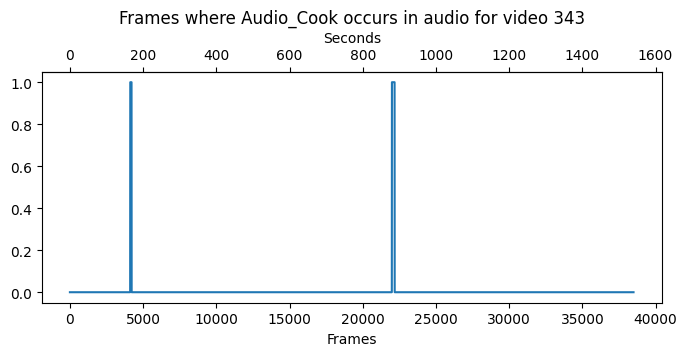

Video: 244
Number of frames: 38706
Number of frames with Swedish Chef in audio: 0
Length: 1548.24 seconds


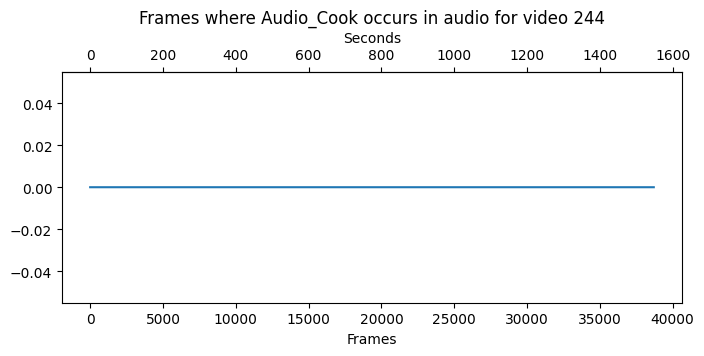

Video: 211
Number of frames: 38681
Number of frames with Swedish Chef in audio: 1157
Length: 1547.24 seconds


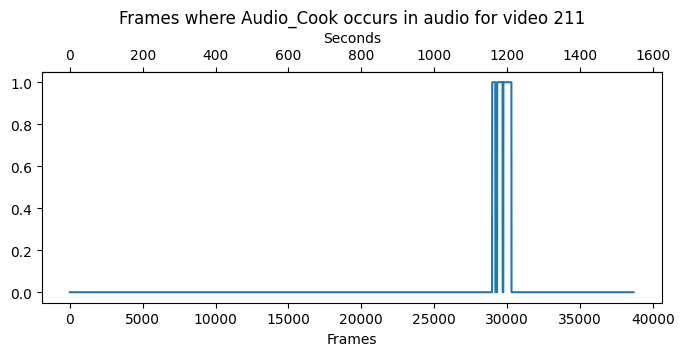

In [80]:
def show_gt_description(df, column='Audio_Cook', fps=25):
    print(f"Video: {df.loc[0, 'Video']}")
    print(f"Number of frames: {df['Frame_number'].count()}")
    print(f"Number of frames with Swedish Chef in audio: {df.loc[df[column] == 1, 'Frame_number'].count()}")
    print(f"Length: {len(df['Frame_number']) / fps} seconds")
    
    # plotting with frames and seconds as x-axis
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_subplot(111)
    ax1.set_title(f"Frames where {column} occurs in audio for video {df.loc[0, 'Video']}")
    ax1.set_xlabel('Frames')
    frame_indicator = np.zeros(len(df['Frame_number']))
    frame_indicator[df[df[column] == 1].index] = 1 
    ax1.plot(df[column].index, frame_indicator)

    def frames_to_sec(x):
        return x / fps
    
    def sec_to_frames(x):
        return x * fps
    
    ax2 = ax1.secondary_xaxis('top', functions=(frames_to_sec, sec_to_frames))
    ax2.set_xlabel('Seconds')
    plt.show()
    
show_gt_description(gts[0])
show_gt_description(gts[1])
show_gt_description(gts[2])